In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_image_dimensions(image_path):
    img = image.load_img(image_path)
    return img.height, img.width

In [6]:
df = pd.DataFrame(columns = ['path','labels'])
for dirname, _, filenames in os.walk(r"C:\Users\Dell\Downloads\top down\Data\Train\1"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'fire',height,width]],columns=['path','labels','height','width']))
for dirname, _, filenames in os.walk(r"C:\Users\Dell\Downloads\top down\Data\Train\0"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'non-fire',height,width]],columns = ['path','labels','height','width']))
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

path    labels  height   width
0  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
1  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
2  C:\Users\Dell\Downloads\top down\Data\Train\0\...  non-fire   720.0  1200.0
3  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
4  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
5  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
6  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
7  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0
8  C:\Users\Dell\Downloads\top down\Data\Train\0\...  non-fire  1114.0  1980.0
9  C:\Users\Dell\Downloads\top down\Data\Train\1\...      fire  1199.0  1200.0

In [7]:
fig = px.scatter(data_frame = df,x=df.index,y='labels',color='labels',title='Distribution of fire and non-fire after being randomized')
fig.update_traces(marker_size=2)

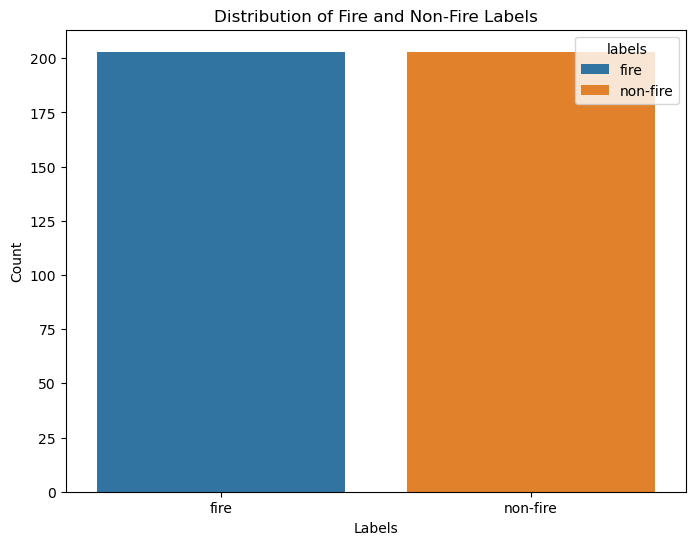

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels', hue = 'labels', dodge = False)
plt.title('Distribution of Fire and Non-Fire Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [9]:
labels_count = df['labels'].value_counts()
fig = px.pie(labels_count, values=labels_count.values, names=labels_count.index, title='Proportion of Fire and Non-Fire Labels')
fig.show()

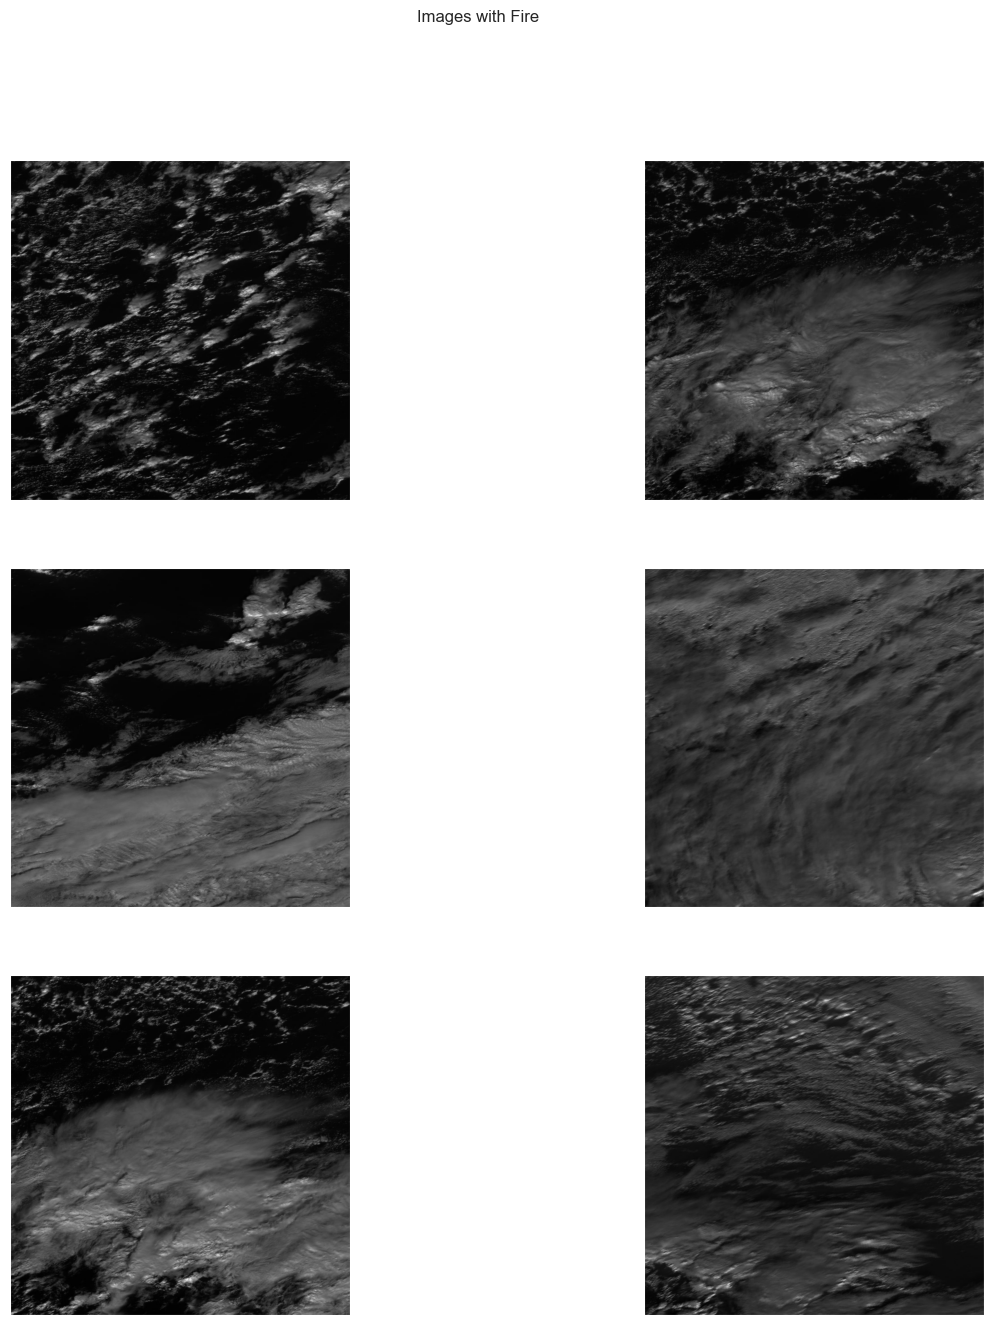

In [10]:
label = 'fire' #label for images with fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

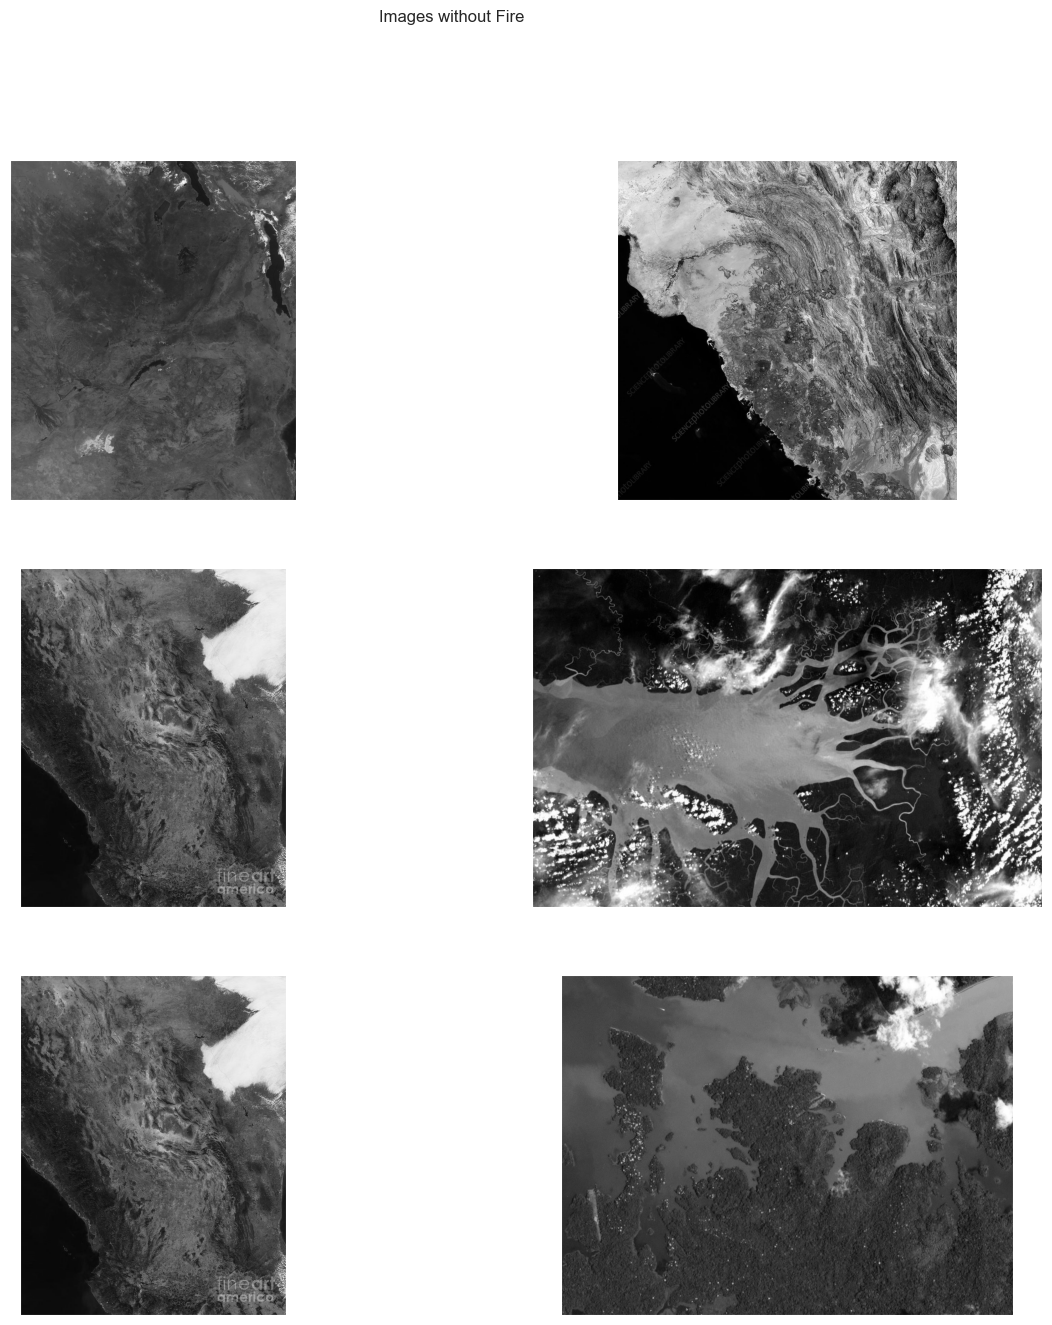

In [11]:
label = 'non-fire' #label for images without fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images without Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

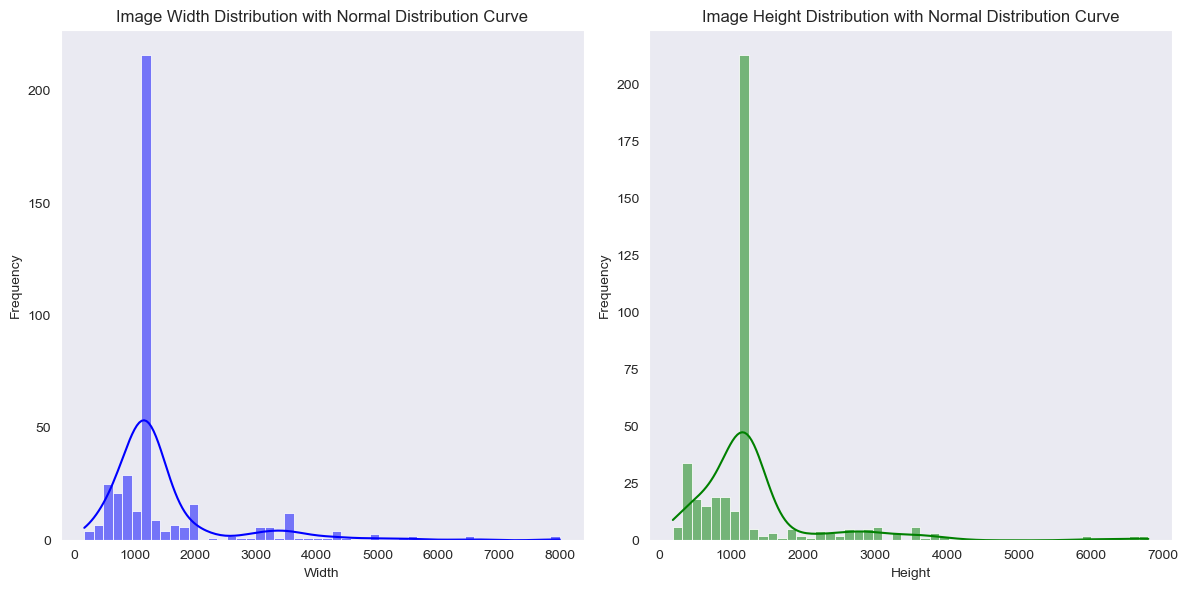

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='width', bins=50, color='blue', kde=True)
plt.title('Image Width Distribution with Normal Distribution Curve')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='height', bins=50, color='green', kde=True)
plt.title('Image Height Distribution with Normal Distribution Curve')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

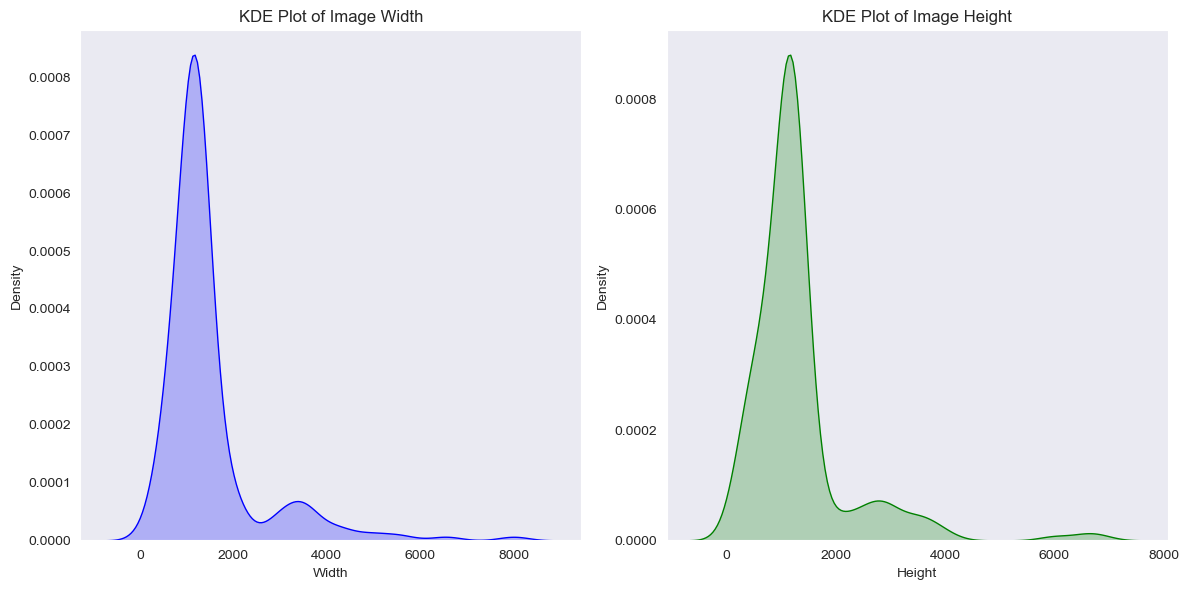

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='width', fill=True, color='blue')
plt.title('KDE Plot of Image Width')
plt.xlabel('Width')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='height', fill=True, color='green')
plt.title('KDE Plot of Image Height')
plt.xlabel('Height')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

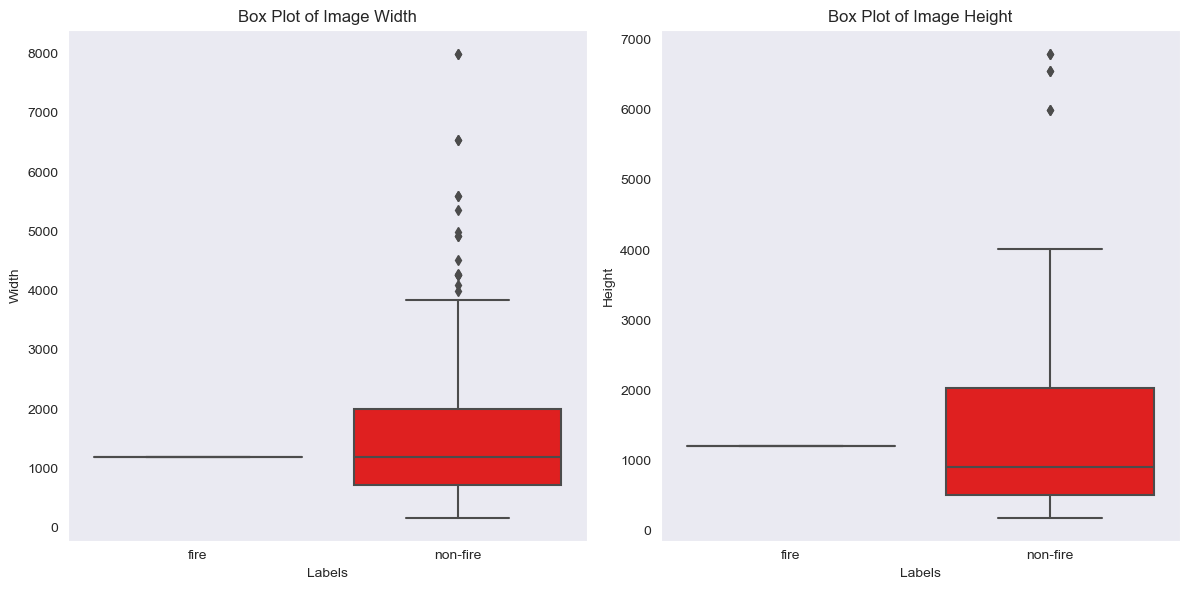

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='width', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Width')
plt.xlabel('Labels')
plt.ylabel('Width')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='height', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Height')
plt.xlabel('Labels')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

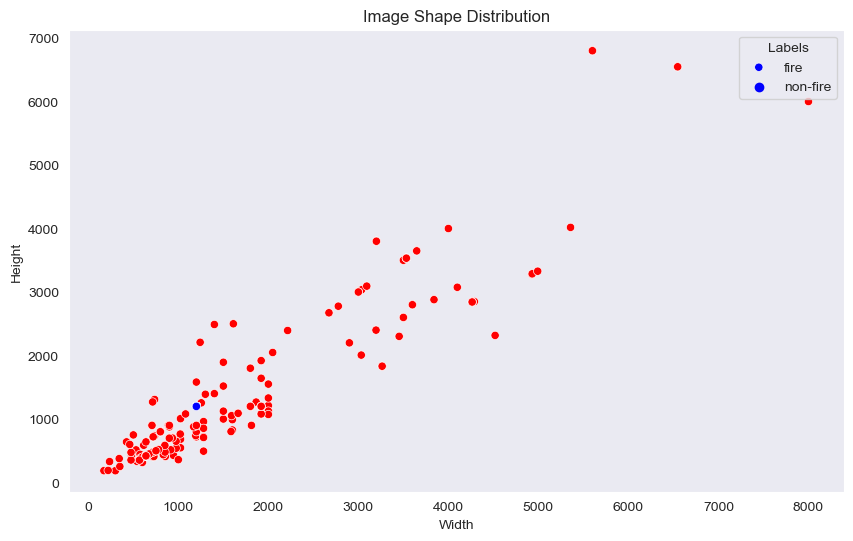

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', hue='labels', palette=['blue', 'red'])
plt.title('Image Shape Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(title='Labels', loc='upper right', labels=['fire', 'non-fire'])
plt.show()

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['path'], df['labels'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Preprocess the images and generate augmented data
image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_train, 'labels': y_train}),
                                                      x_col='path', y_col='labels', target_size=(244, 244),
                                                      class_mode='raw', batch_size=100)
test_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'labels': y_test}),
                                                     x_col='path', y_col='labels', target_size=(244, 244),
                                                     class_mode='raw', batch_size=100)

# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 324 validated image filenames.
Found 82 validated image filenames.
Epoch 1/5
4/4 [==============================] - 49s 15s/step - loss: 11.2508 - accuracy: 0.4815 - val_loss: 8.8074 - val_accuracy: 0.4878
Epoch 2/5
4/4 [==============================] - 41s 13s/step - loss: 7.1367 - accuracy: 0.5031 - val_loss: 4.3254 - val_accuracy: 0.4878
Epoch 3/5
4/4 [==============================] - 41s 13s/step - loss: 1.9524 - accuracy: 0.5031 - val_loss: 0.7784 - val_accuracy: 0.4878
Epoch 4/5
4/4 [==============================] - 44s 10s/step - loss: 0.7247 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 5/5
1/1 [==============================] - 8s 8s/step - loss: 0.6931 - accuracy: 0.5122
Test Loss: 0.6930986046791077
Test Accuracy: 0.5121951103210449


In [26]:

# Create an empty DataFrame
df_test = pd.DataFrame(columns=['path', 'labels'])

# Define the paths for 'fire' and 'non-fire' test images
fire_dir = r"C:\Users\Dell\Downloads\top down\Test\1"
non_fire_dir = r"C:\Users\Dell\Downloads\top down\Test\0"

# Iterate through 'fire' images
for dirname, _, filenames in os.walk(fire_dir):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df_test = df_test.append(pd.DataFrame([[os.path.join(dirname, filename), 'fire', height, width]],
                                              columns=['path', 'labels', 'height', 'width']))

# Iterate through 'non-fire' images
for dirname, _, filenames in os.walk(non_fire_dir):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df_test = df_test.append(pd.DataFrame([[os.path.join(dirname, filename), 'non-fire', height, width]],
                                              columns=['path', 'labels', 'height', 'width']))

In [27]:
# Save the model to disk.
model.save_weights('cnn.h5')

image_generator = ImageDataGenerator(rescale=1./255)

# Create a data generator for the test images
test_data_generator = image_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='path',
    y_col='labels',
    target_size=(244, 244),
    class_mode='raw',  # 'raw' because you want to predict labels
    batch_size=1  # Set batch size to 1 to process one image at a time
)

# Predict on the test images.
predictions = model.predict(test_data_generator)

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(df_test['labels'].values)

Found 5 validated image filenames.
5/5 [==============================] - 0s 21ms/step
[0 0 0 0 0]
['fire' 'fire' 'fire' 'non-fire' 'non-fire']
